In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl

sys.path.insert(0, '..')
from context.nd_array.nd_array.normalize_2d_array import normalize_2d_array
from context.fit_skew_t_pdf import fit_skew_t_pdf
from context.fit_skew_t_pdfs import fit_skew_t_pdfs
from context.fit_skew_t_pdf_globally import fit_skew_t_pdf_globally
from context.compute_context import compute_context
from context.make_context_matrix_and_summarize_context import *
from context.plot_context import plot_context
from context.plot.plot.plot_distribution import plot_distribution

In [3]:
feature_x_sample = pd.read_table('gene_x_cell_line.tsv', index_col=0)

feature_x_sample = pd.DataFrame(
    normalize_2d_array(feature_x_sample.values, '-0-', None),
    index=feature_x_sample.index,
    columns=feature_x_sample.columns)

feature_x_sample

22RV1_PROSTATE  697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  786O_KIDNEY  \
KRAS          1.273035                                1.196565     0.049496   
SOX10        -0.904389                                0.902912     0.411764   
ERBB3         0.535069                                0.373426    -0.574884   
MYC           0.929646                                0.601177    -0.750205   
MAP4K4        1.081757                               -0.735906     0.414458   
GAPDH         1.777446                               -0.814863    -1.259176   
FAT1          0.116246                               -0.895063     0.276025   
PTEN         -0.575299                               -0.005482    -0.959306   
TP53         -0.344438                                1.166930    -0.460697   

        A1207_CENTRAL_NERVOUS_SYSTEM  A172_CENTRAL_NERVOUS_SYSTEM  \
KRAS                       -0.373866                     0.757640   
SOX10                      -0.929464                     0.620036   
ERBB3                       0.411764                     0.530925   
MYC                         1.260186                     1.134187   
MAP4K4                      0.274367                     1.042175   
GAPDH                       2.179069                    -0.883458   
FAT1                        0.035611                    -0.355422   
PTEN                       -0.157512                    -0.884701   
TP53                        1.192213                     0.688838   

        A204_SOFT_TISSUE  A2058_SKIN  A549_LUNG  A673_BONE  ACHN_KIDNEY  \
KRAS            1.014405    0.535691  -0.999510   1.019379     0.768209   
SOX10          -0.509605   -3.134450   0.328041   0.966326    -0.582552   
ERBB3           0.048750    0.343376  -0.067841   0.371768     0.102009   
MYC             0.477043    1.042589  -0.219890   0.417359     0.485747   
MAP4K4          0.415287    1.046941  -0.396869  -0.052796     0.141840   
GAPDH           2.228805   -1.805656   1.094398  -0.388165     2.349002   
FAT1            0.194229   -0.398112  -0.401635  -0.212222    -0.575713   
PTEN           -0.085166   -0.443911  -0.291386  -0.537789    -0.880142   
TP53            1.056474   -1.189130   0.211989  -0.737150     0.234785   

            ...       UACC812_BREAST  WM115_SKIN  WM1799_SKIN  WM2664_SKIN  \
KRAS        ...            -0.144332    0.625631    -0.169096     0.549990   
SOX10       ...             0.424405   -4.222437    -0.631874    -3.501257   
ERBB3       ...            -3.144812    1.100822     0.452589     0.469168   
MYC         ...             0.429172    1.005908    -0.960550    -0.265067   
MAP4K4      ...             0.012531   -0.102553     0.037165     0.191100   
GAPDH       ...             1.616631    1.798377    -1.306218     2.000432   
FAT1        ...            -0.561414   -0.249110     0.070779    -0.371172   
PTEN        ...            -0.826468   -0.378839     0.057930    -0.108729   
TP53        ...            -0.429198    2.690940     0.572372     3.366528   

        WM793_SKIN  WM88_SKIN  WM983B_SKIN  YD38_UPPER_AERODIGESTIVE_TRACT  \
KRAS      0.169672   0.206414    -0.222584                       -0.539447   
SOX10    -4.419310  -2.197746    -3.934379                       -0.100273   
ERBB3    -0.106884   0.858564     0.627704                       -1.035983   
MYC      -0.081581   0.892965    -0.833100                       -1.249850   
MAP4K4    1.627408   0.434767     1.090875                        1.251690   
GAPDH    -1.203015   0.567398    -0.832063                       -0.500487   
FAT1     -0.677466  -0.173137     0.725726                        0.240588   
PTEN     -0.339257  -0.754972     0.865817                        0.230226   
TP53      1.269305   1.307022    -0.414277                       -0.718706   

        YD8_UPPER_AERODIGESTIVE_TRACT  ZR751_BREAST  
KRAS                         1.156983     -0.385678  
SOX10                       -0.802843      0.667493  
ERBB3                       -0.512299     -0.346303

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


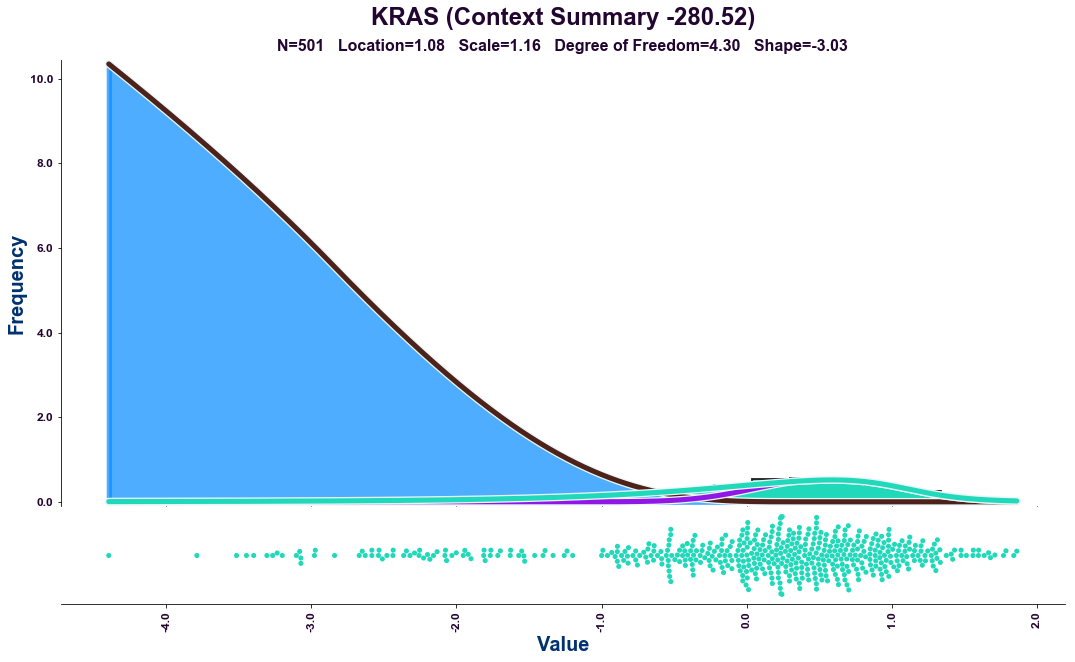

In [4]:
array_1d = feature_x_sample.loc['KRAS']

plot_context(array_1d, 'KRAS')

In [5]:
n, location, scale, df, shape = fit_skew_t_pdf(array_1d)
print('N={}\tLocation={:.3f}\tScale={:.3f}\tDF={:.3f}\tShape={:.3f}'.format(
    n, location, scale, df, shape))

n, location, scale, df, shape = fit_skew_t_pdf(
    array_1d, fit_fixed_location=10, fit_fixed_scale=10)
print('N={}\tLocation={:.3f}\tScale={:.3f}\tDF={:.3f}\tShape={:.3f}'.format(
    n, location, scale, df, shape))

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


N=501	Location=1.083	Scale=1.164	DF=4.304	Shape=-3.030
N=501	Location=10.000	Scale=10.000	DF=14163340.542	Shape=-16799704.068


In [6]:
context_dict = compute_context(array_1d)

for key, value in context_dict.items():
    print(key)
    print(value)
    if value is not None:
        print(value.shape)
    print()

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


fit
[ 501.            1.08313306    1.1642748     4.30439247   -3.03015488]
(5,)

grid
[-4.39651442 -4.39442749 -4.39234055 ...,  1.85803163  1.86011856
  1.8622055 ]
(3000,)

pdf
[ 0.00523723  0.0052461   0.00525498 ...,  0.02071609  0.02054863
  0.02038261]
(3000,)

r_pdf_reference
[  2.22044605e-16   2.22044605e-16   2.22044605e-16 ...,   2.07160946e-02
   2.05486308e-02   2.03826099e-02]
(3000,)

r_context_indices
[-10.35012179 -10.34438891 -10.33865476 ...,   0.           0.           0.        ]
(3000,)

s_pdf_reference
None

s_context_indices
None

context_indices
[-10.35012179 -10.34438891 -10.33865476 ...,   0.           0.           0.        ]
(3000,)

context_indices_like_array
[  0.00000000e+00   0.00000000e+00  -5.79697019e-03  -9.38624936e-02
   0.00000000e+00   0.00000000e+00  -0.00000000e+00  -6.41919143e-01
   0.00000000e+00   0.00000000e+00  -1.03501218e+01   0.00000000e+00
   0.00000000e+00  -2.66459432e+00  -1.23607596e-02  -0.00000000e+00
  -0.00000000e+00  -2.037

In [7]:
feature_x_skew_t_pdf_fit_parameter = fit_skew_t_pdfs(feature_x_sample)

feature_x_skew_t_pdf_fit_parameter

(1/9) KRAS ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


(2/9) SOX10 ...
(3/9) ERBB3 ...
(4/9) MYC ...
(5/9) MAP4K4 ...
(6/9) GAPDH ...
(7/9) FAT1 ...
(8/9) PTEN ...
(9/9) TP53 ...


N  Location     Scale  Degree of Freedom     Shape
Feature                                                        
KRAS     501.0  1.083133  1.164275           4.304392 -3.030155
SOX10    501.0  0.550756  0.592344           2.306226 -0.929914
ERBB3    501.0  0.452074  0.606843           3.987367 -1.111803
MYC      501.0 -0.946118  1.227359          15.292884  2.261243
MAP4K4   501.0  0.482438  0.885836           7.522607 -0.764379
GAPDH    501.0 -1.666089  2.258010        1279.158480  2.326992
FAT1     501.0 -0.173529  0.362648          15.376174  0.699471
PTEN     501.0 -0.808029  1.057576      198799.571299  3.093096
TP53     501.0 -1.357790  1.506077           6.161618  5.347668

In [8]:
context__feature_x_sample, feature_context_summary = make_context_matrix_and_summarize_context(
    feature_x_sample)

(1/9) KRAS ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


(2/9) SOX10 ...
(3/9) ERBB3 ...
(4/9) MYC ...
(5/9) MAP4K4 ...
(6/9) GAPDH ...
(7/9) FAT1 ...
(8/9) PTEN ...
(9/9) TP53 ...


In [9]:
context__feature_x_sample

22RV1_PROSTATE  697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  786O_KIDNEY  \
Feature                                                                        
KRAS           0.000000                                0.000000    -0.005797   
SOX10         -0.145472                                0.000000     0.000000   
ERBB3          0.000000                                0.000000    -0.035894   
MYC            0.159259                                0.045898    -0.000000   
MAP4K4         0.000000                               -0.005620     0.000000   
GAPDH          0.147720                               -0.000000    -0.000000   
FAT1           0.000000                               -0.000000     0.000484   
PTEN          -0.000000                                0.000255    -0.000000   
TP53           0.003619                                1.819321     0.000666   

         A1207_CENTRAL_NERVOUS_SYSTEM  A172_CENTRAL_NERVOUS_SYSTEM  \
Feature                                                              
KRAS                        -0.093862                     0.000000   
SOX10                       -0.156499                     0.000000   
ERBB3                        0.000000                     0.000000   
MYC                          0.370196                     0.277466   
MAP4K4                       0.000000                     0.000000   
GAPDH                        0.266776                    -0.000000   
FAT1                         0.000000                    -0.000000   
PTEN                         0.000010                    -0.000000   
TP53                         1.898709                     0.677980   

         A204_SOFT_TISSUE  A2058_SKIN     A549_LUNG  A673_BONE  ACHN_KIDNEY  \
Feature                                                                       
KRAS             0.000000   -0.000000 -6.419191e-01   0.000000     0.000000   
SOX10           -0.027298   -2.686949  0.000000e+00   0.000000    -0.041007   
ERBB3           -0.000000    0.000000 -0.000000e+00   0.000000    -0.000000   
MYC              0.024180    0.219461  0.000000e+00   0.016954     0.025322   
MAP4K4           0.000000    0.000000 -0.000000e+00  -0.000000     0.000000   
GAPDH            0.284191   -0.000000  3.476300e-02   0.000000     0.329058   
FAT1             0.000000   -0.000000 -0.000000e+00  -0.000000    -0.000000   
PTEN             0.000061   -0.000000  2.782723e-09  -0.000000    -0.000000   
TP53             1.497021   -0.000000  1.468383e-01   0.000000     0.161041   

             ...       UACC812_BREAST  WM115_SKIN  WM1799_SKIN  WM2664_SKIN  \
Feature      ...                                                              
KRAS         ...            -0.027730    0.000000    -0.032478    -0.000000   
SOX10        ...             0.000000   -4.539088    -0.052092    -3.320592   
ERBB3        ...            -2.494607    0.000000     0.000000     0.000000   
MYC          ...             0.018304    0.198470    -0.000000     0.000000   
MAP4K4       ...            -0.000000   -0.000000    -0.000000     0.000000   
GAPDH        ...             0.111442    0.153095    -0.000000     0.209592   
FAT1         ...            -0.000000   -0.000000     0.000000    -0.000000   
PTEN         ...            -0.000000   -0.000000     0.000620     0.000036   
TP53         ...             0.001148    8.431809     0.498254    11.160716   

         WM793_SKIN  WM88_SKIN  WM983B_SKIN  YD38_UPPER_AERODIGESTIVE_TRACT  \
Feature                                                                       
KRAS      -0.001129  -0.000522    -0.044636                       -0.181002   
SOX10     -4.857686  -1.294165    -4.063789                       -0.000004   
ERBB3     -0.000000   0.000000     0.000000                       -0.226735   
MYC        0.000000   0.142075    -0.000000                       -0.000000   
MAP4K4     0.000000   0.000000     0.000000                        0.000000   
GAPDH     -0.000000   0.005814    -0.000000                     

In [10]:
feature_context_summary

Feature
KRAS     -280.517163
SOX10    -109.162997
ERBB3     -35.687237
MYC        61.917490
MAP4K4    -18.848040
GAPDH      38.057480
FAT1        3.487624
PTEN       17.734292
TP53      557.529830
Name: Context Summary, dtype: float64

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


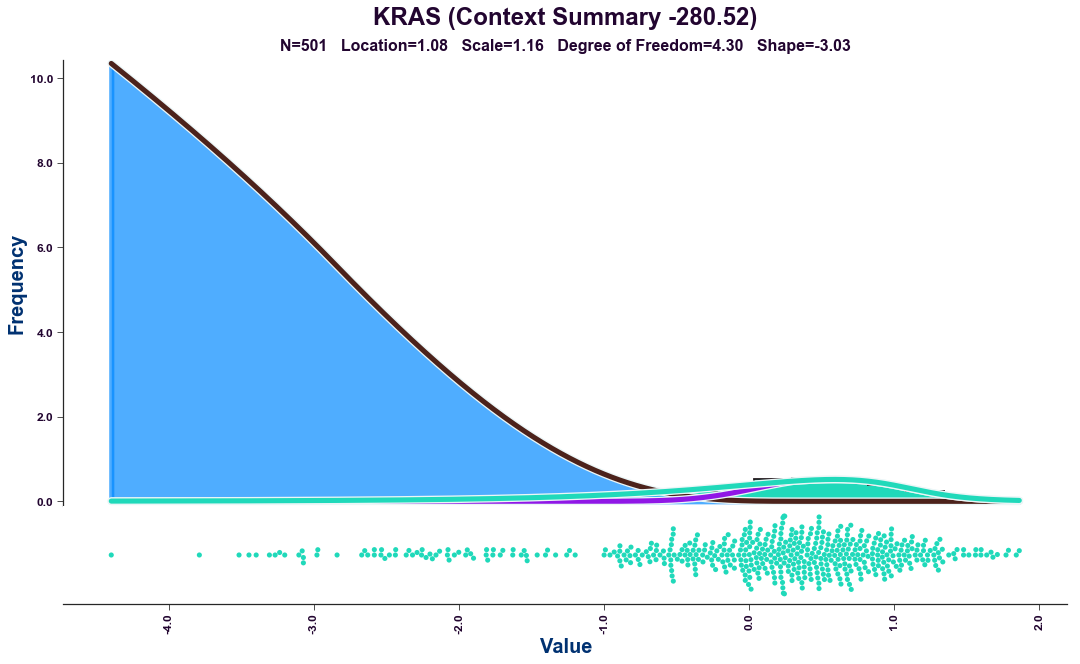

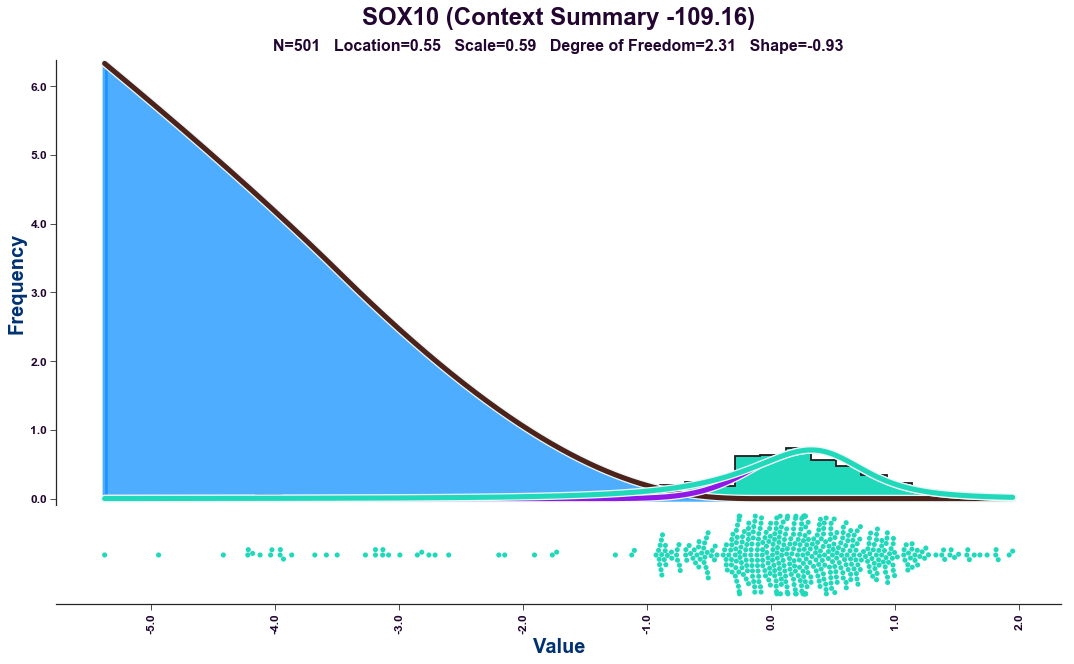

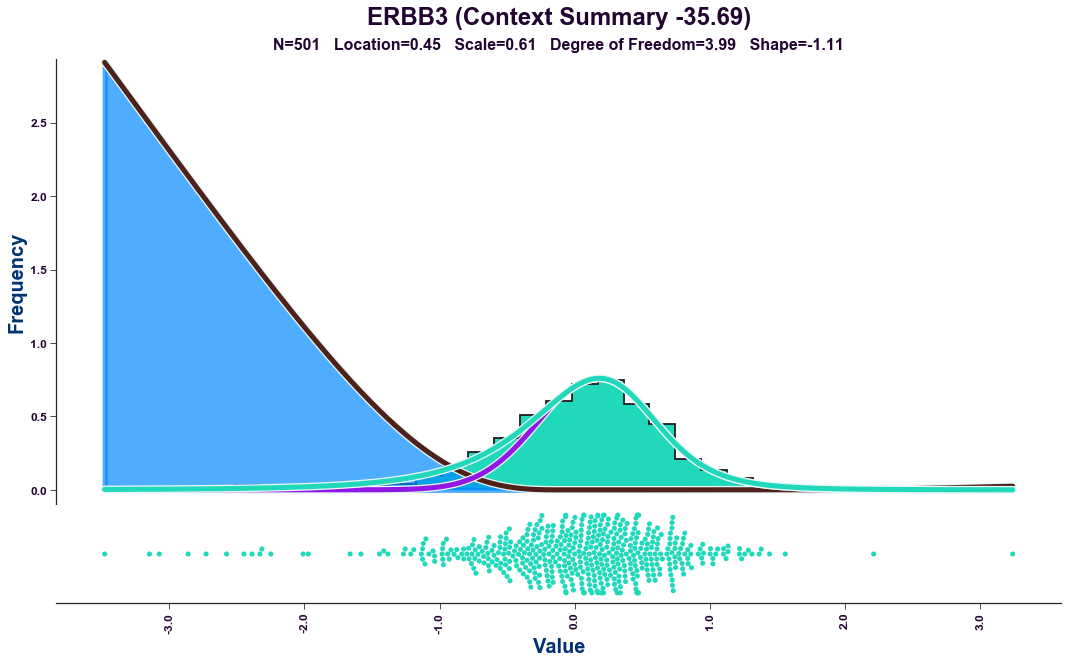

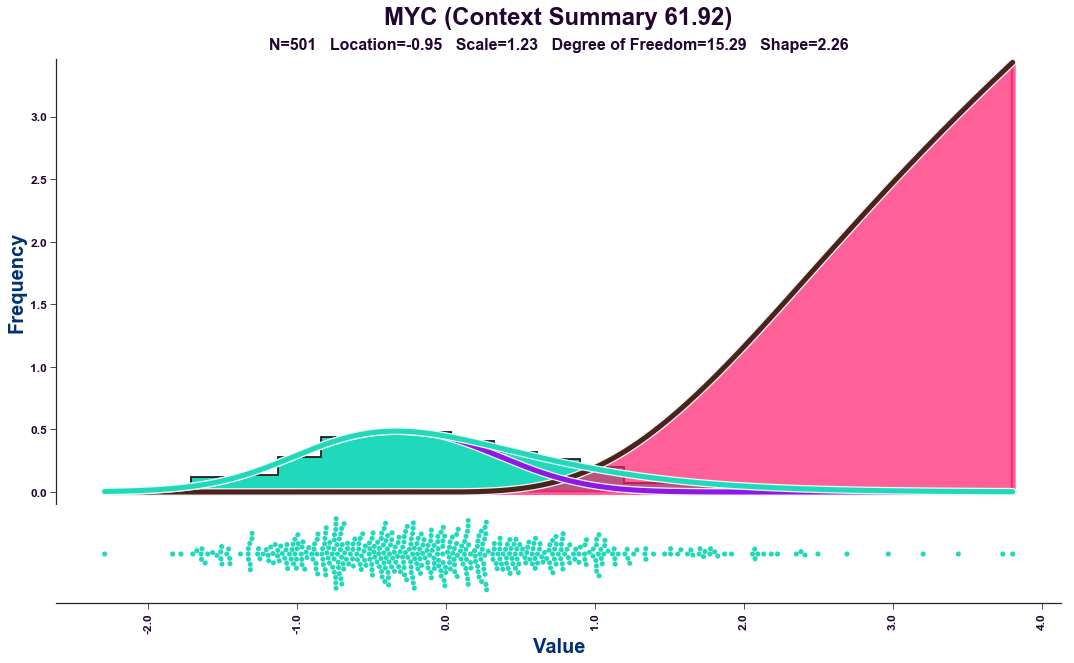

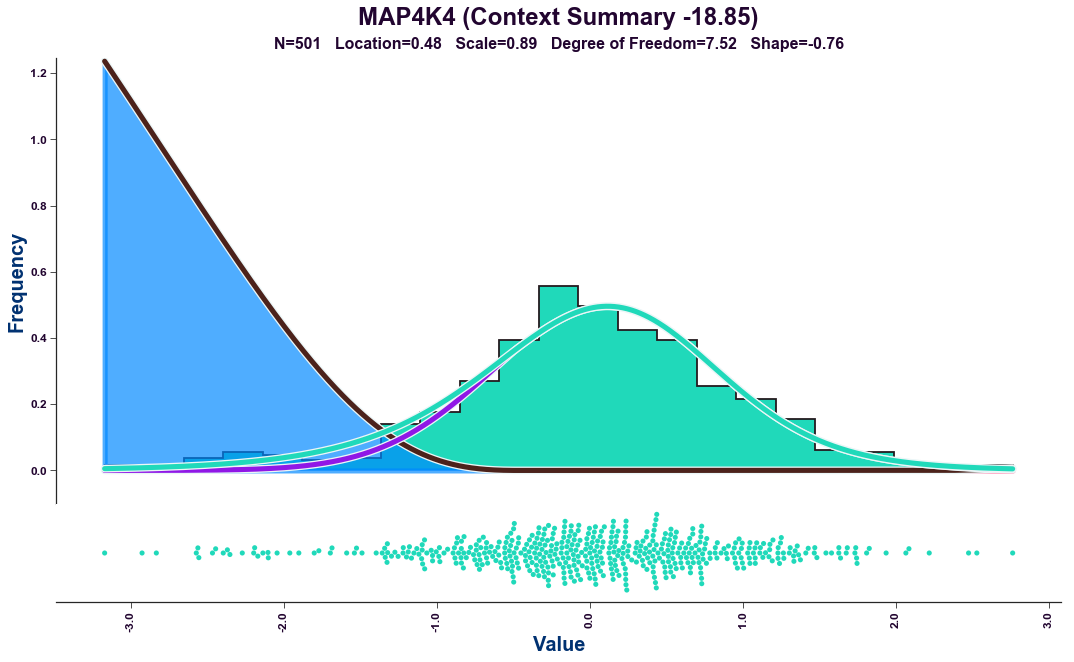

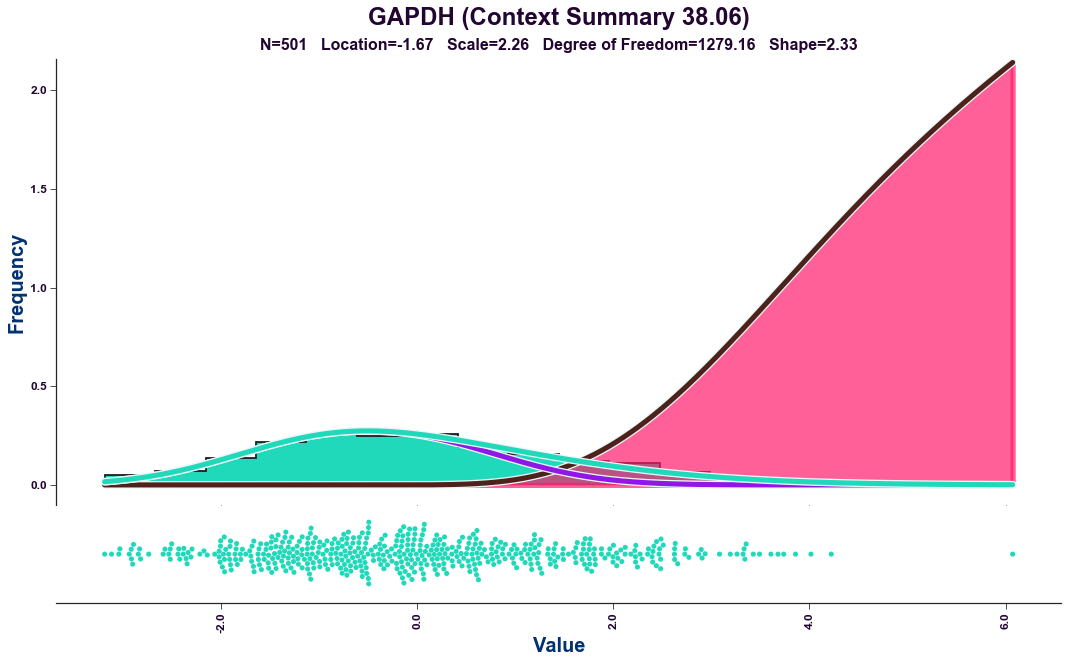

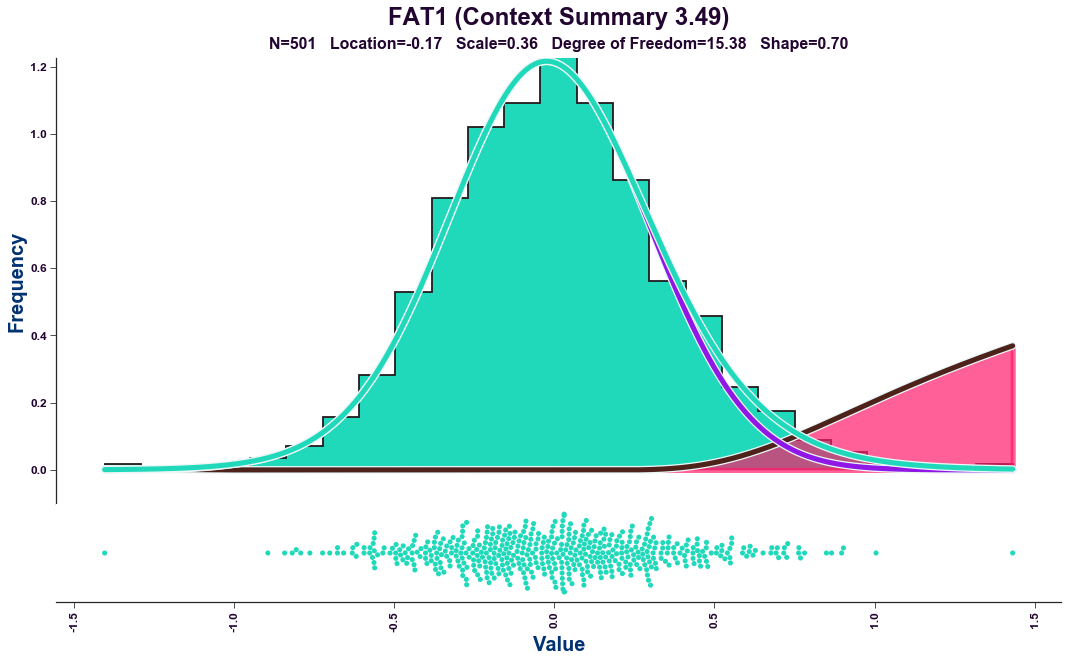

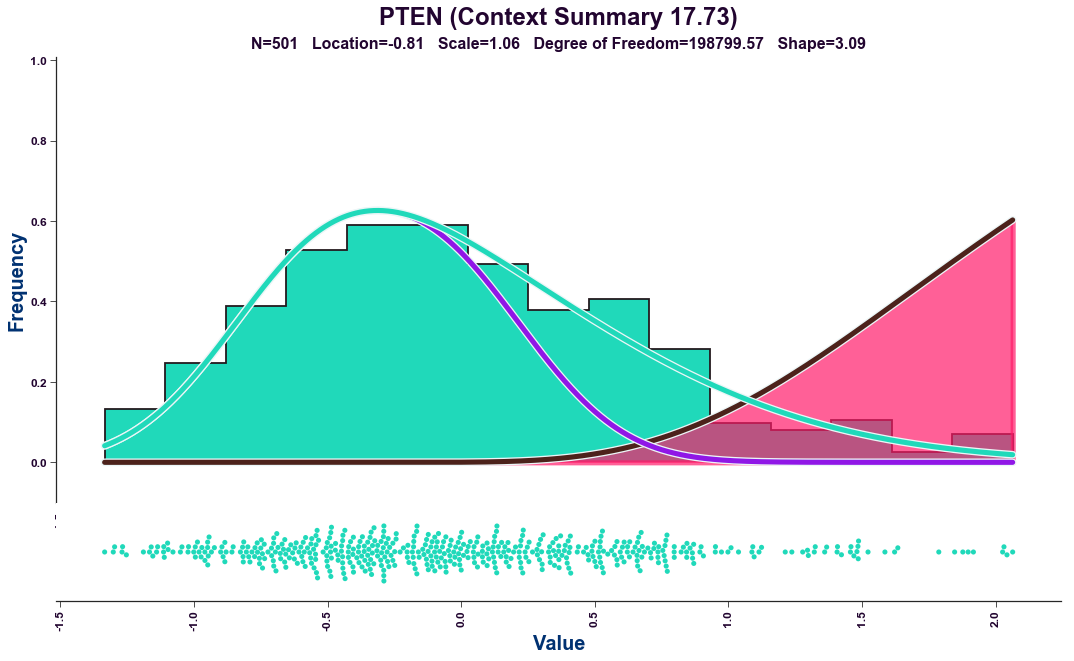

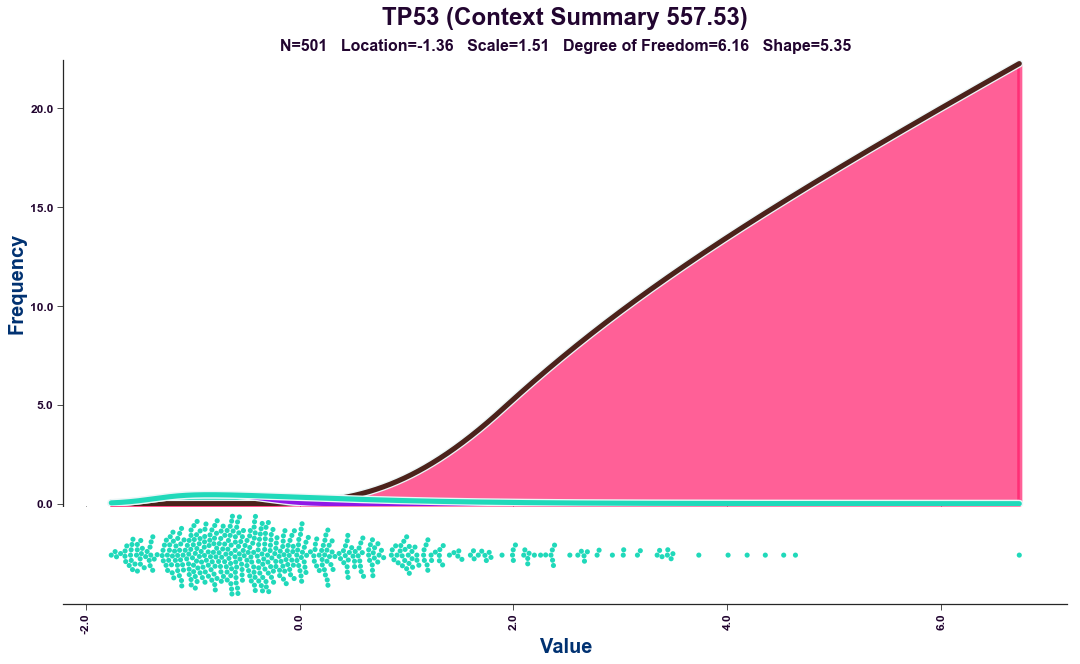

In [11]:
for feature, feature_vector in feature_x_sample.iterrows():
    plot_context(feature_vector, feature, add_context_summary_to_title=True)

    mpl.pyplot.show()

In [12]:
feature_x_sample = pd.read_table('compound_x_cell_line.tsv', index_col=0)

feature_x_sample = feature_x_sample.dropna(thresh=int(
    feature_x_sample.shape[1] * 0.9))

feature_x_sample = feature_x_sample.apply(
    lambda feature_vector: feature_vector.fillna(feature_vector.mean()),
    axis=1)

feature_x_sample = pd.DataFrame(
    normalize_2d_array(feature_x_sample.values, '-0-', None),
    index=feature_x_sample.index,
    columns=feature_x_sample.columns)

feature_x_sample

22RV1_PROSTATE  2313287_STOMACH  \
16-beta-bromoandrosterone        0.657891        -0.158800   
1S,3R-RSL-3                     -1.608909        -1.207969   
3-Cl-AHPC                       -1.195914        -1.127462   
AA-COCF3                        -0.427873        -1.569043   
AC55649                          0.347919         0.319505   
AGK-2                            0.959683         1.601584   
AM-580                           0.678986         0.183892   
AT7867                           1.046217        -0.046004   
AZ-3146                          0.305298         0.555858   
AZD4547                          0.174420         0.115440   
AZD6482                         -0.098958        -0.482979   
AZD7545                          0.550262         0.463297   
AZD7762                         -0.868291        -1.779824   
AZD8055                         -2.495429        -2.163544   
B02                              0.939449        -0.077432   
BI-2536                         -2.491555        -3.493066   
BIBR-1532                       -0.182908         0.235554   
BIX-01294                       -0.150189         0.217903   
BMS-195614                       0.232540         0.925672   
BMS-270394                       1.181830         1.149541   
BMS-345541                      -0.307823        -0.529044   
BMS-536924                      -0.049874         0.228235   
BMS-754807                      -0.942340         0.293243   
BRD-A71883111                    0.210584         2.010574   
BRD-K02251932                    0.552414         0.809863   
BRD-K04800985                    0.883051         0.475782   
BRD-K11533227                    0.385374         0.354376   
BRD-K13999467                   -0.027492         0.641962   
BRD-K14844214                    0.786185         0.779297   
BRD-K17060750                    0.588147         0.927825   
...                                   ...              ...   
semagacestat                     0.111134         0.818043   
serdemetan                      -0.344352         0.003936   
sildenafil                       0.706970         0.551553   
silmitasertib                   -0.181617         0.287646   
simvastatin                      0.236845         0.393553   
sirolimus                       -2.014930         0.078846   
sorafenib                        0.629046        -0.031367   
spautin-1                        0.555858         0.452104   
sunitinib                       -0.457568        -0.309050   
tacrolimus                       0.704817         0.307881   
tamatinib                        0.564469         0.592452   
tamoxifen                        0.232110         0.350502   
tandutinib                       0.537346         0.520556   
tanespimycin                    -0.920814        -1.306988   
temozolomide                     1.154277         0.845166   
tipifarnib-P1                    0.136535         0.734092   
tivozanib                        0.496447         0.321227   
topotecan                       -2.770788        -2.223945   
tosedostat                      -0.976781        -0.461883   
tretinoin                        0.264829        -0.406347   
triazolothiadiazine             -1.173958        -2.129060   
trifluoperazine                  0.291952         0.225221   
triptolide                      -0.296995        -0.318952   
valdecoxib                      -0.252222        -0.605245   
vandetanib                      -0.081737        -0.163535   
veliparib                        0.203265         0.678986   
vincristine                     -3.485446        -3.528325   
vorapaxar                        0.121897         0.603215   
vorinostat                      -1.127462        -0.602232   
zebularine                       0.031489        -0.003383   

                           253J_URINARY_TRACT  253JBV_URINARY_TRACT  \
16-beta-bromoandrosterone            0.775852              0.666932   
1S,3R-RSL-3                         -2.3

Dropping 0 missing values (of total 211560) ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


N=211560   Location=0.92   Scale=0.92   Degree of Freedom=3.10   Shape=-2.98


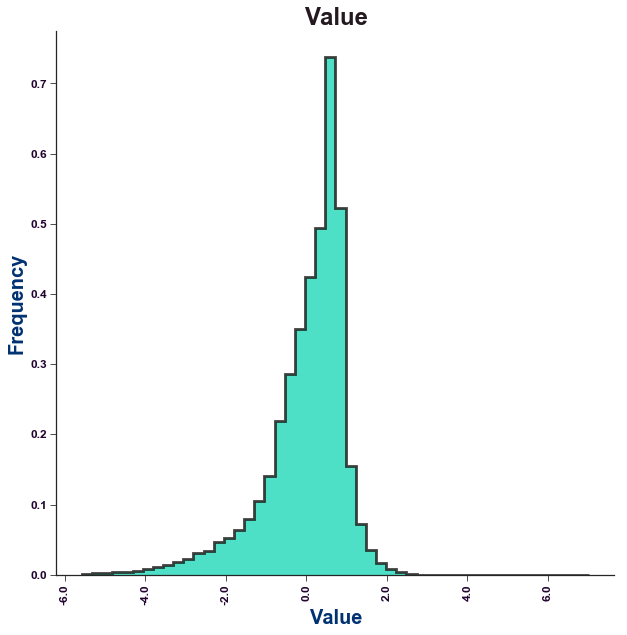

In [13]:
_, global_location, global_scale, _, _ = fit_skew_t_pdf_globally(
    feature_x_sample)

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


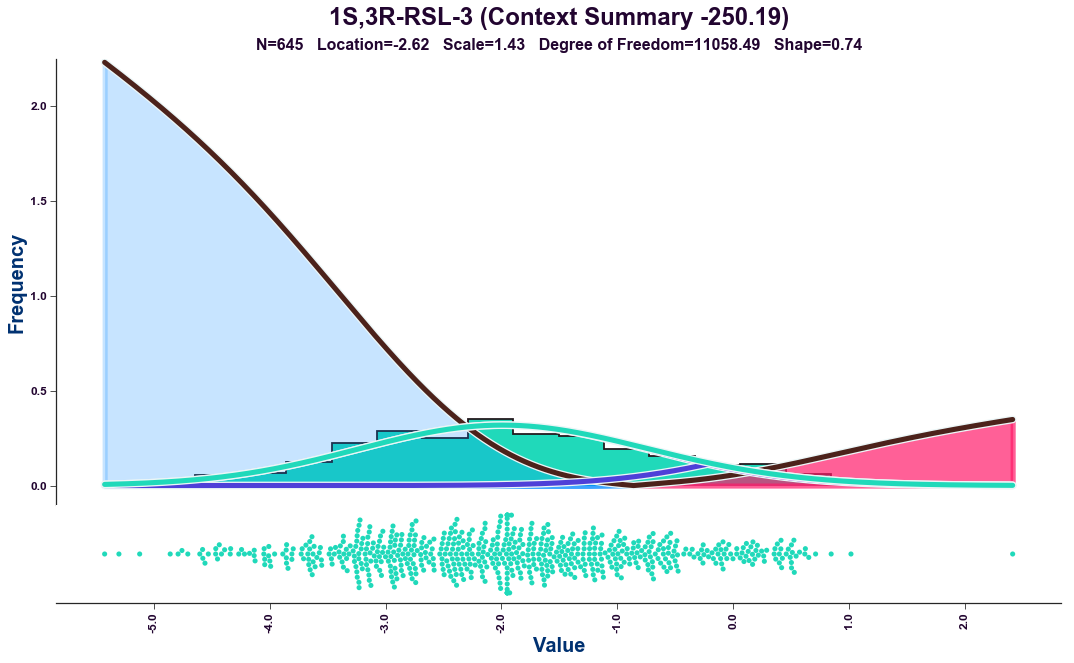

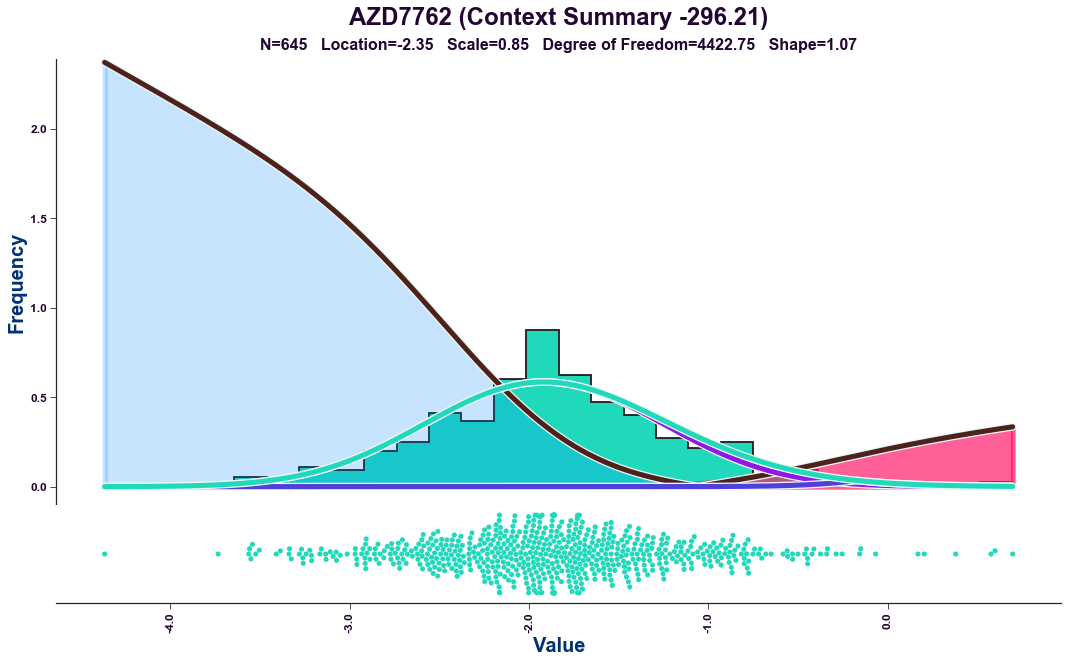

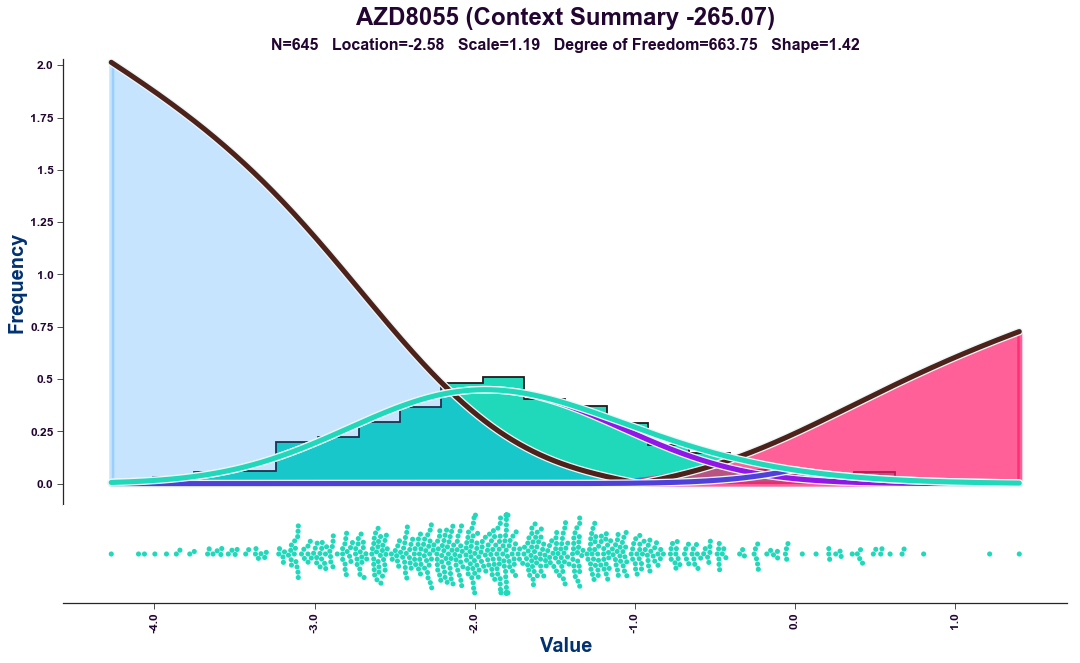

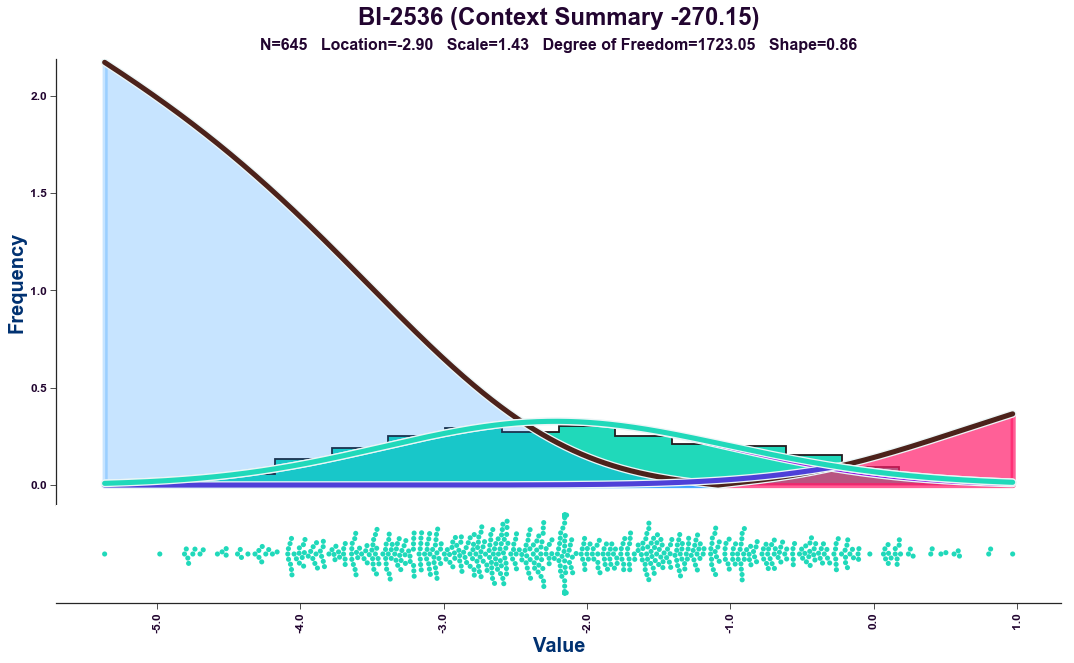

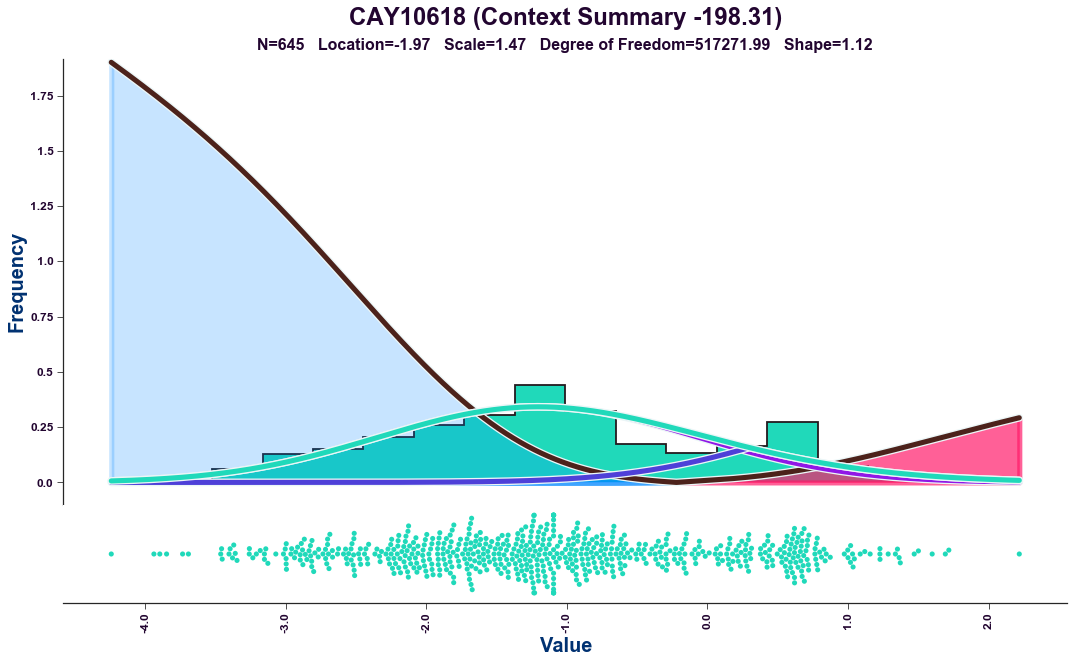

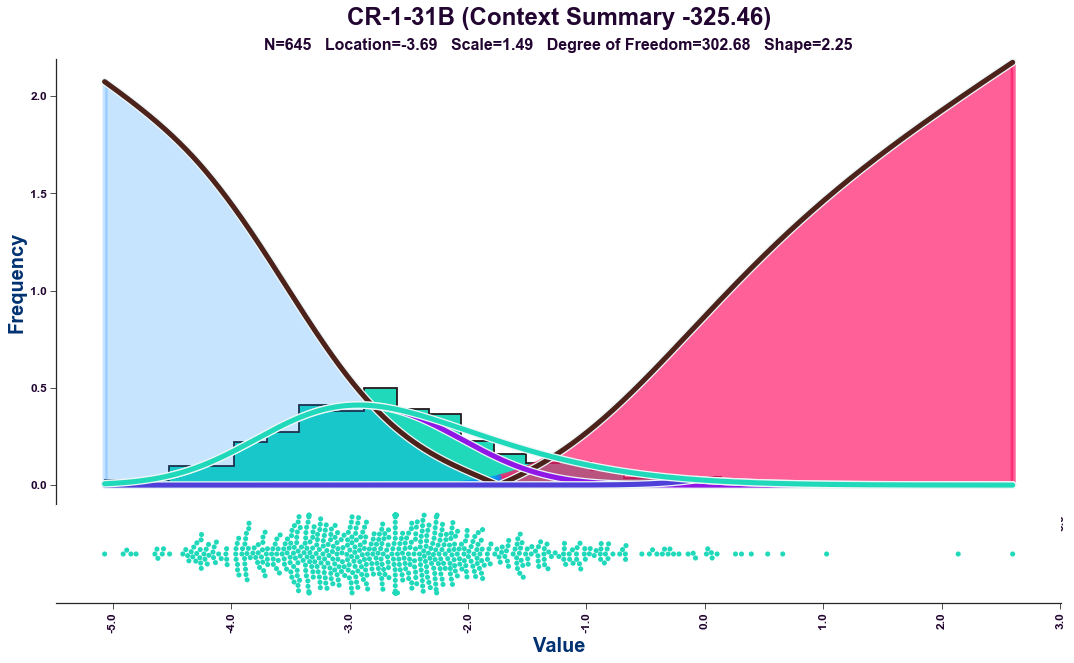

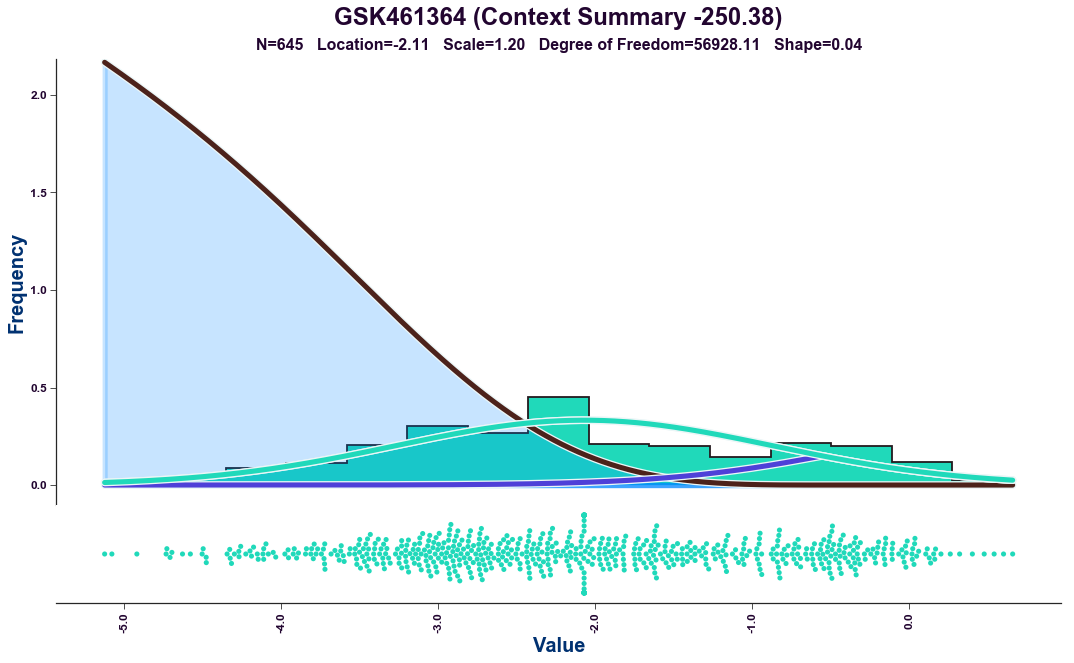

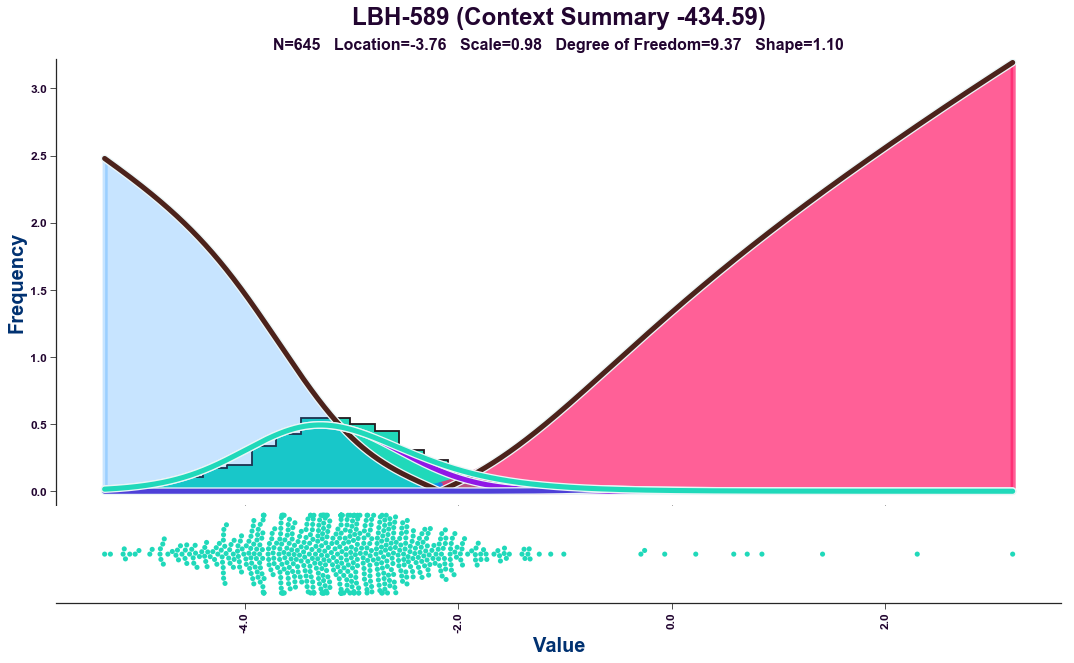

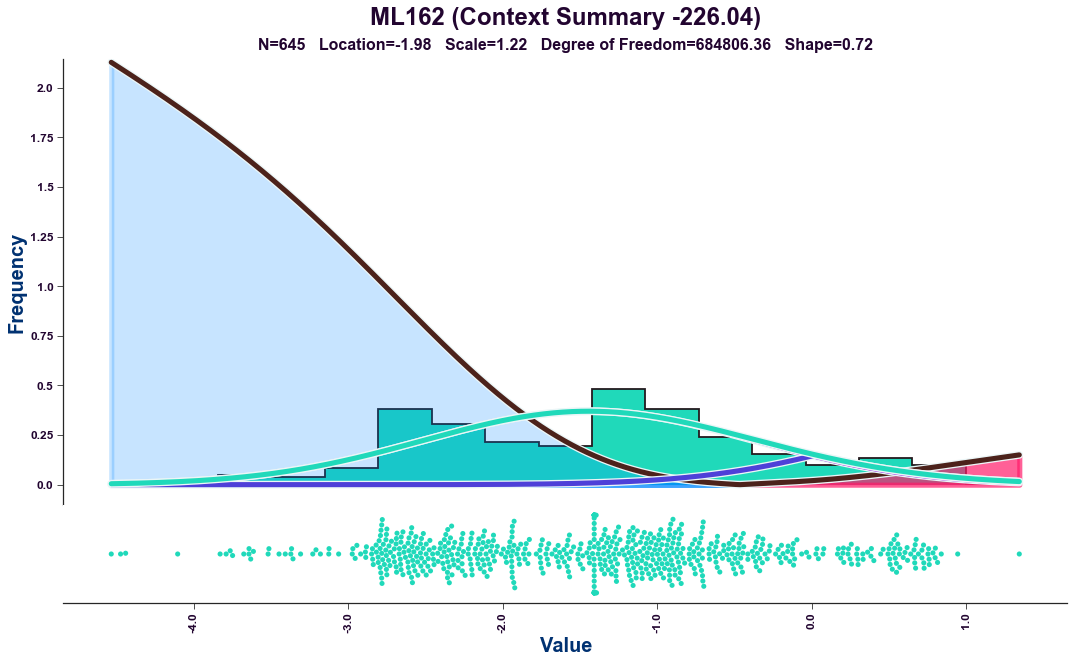

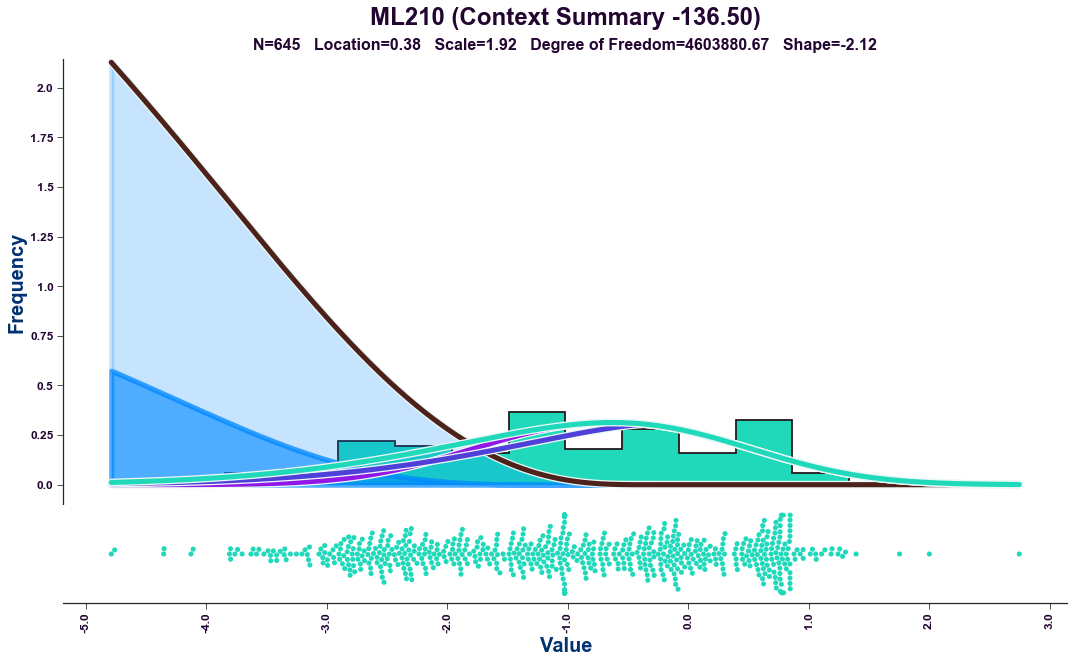

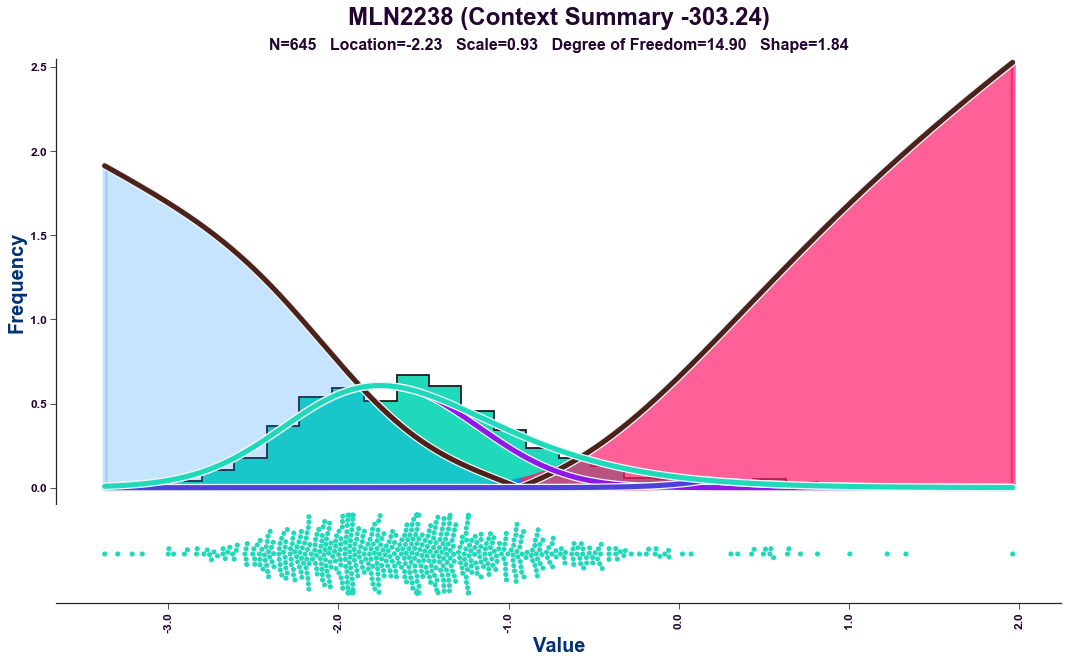

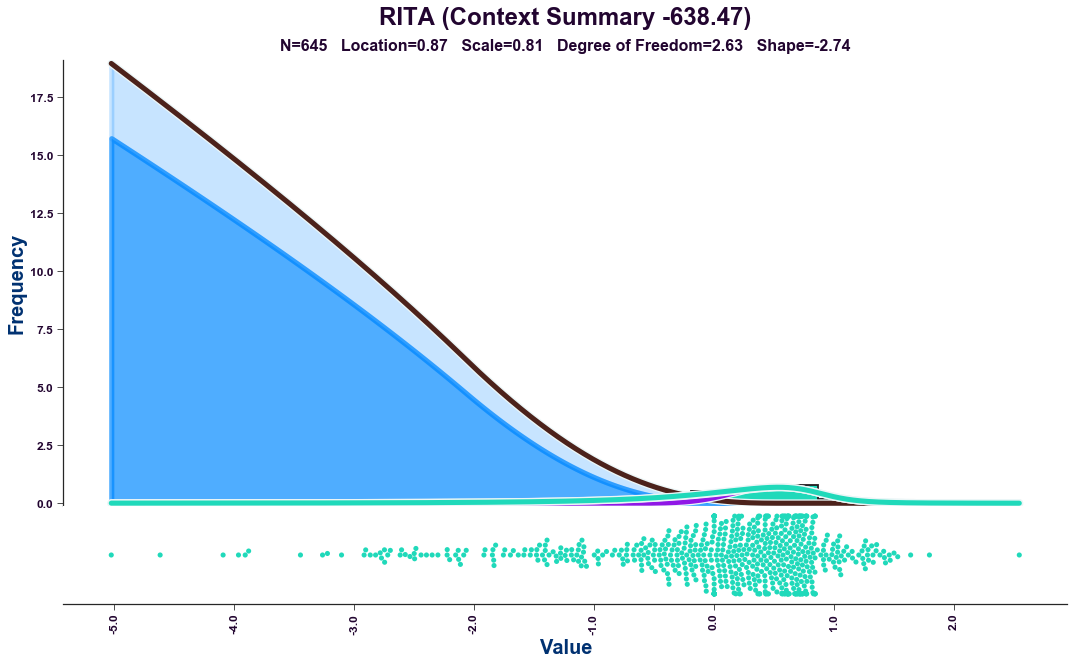

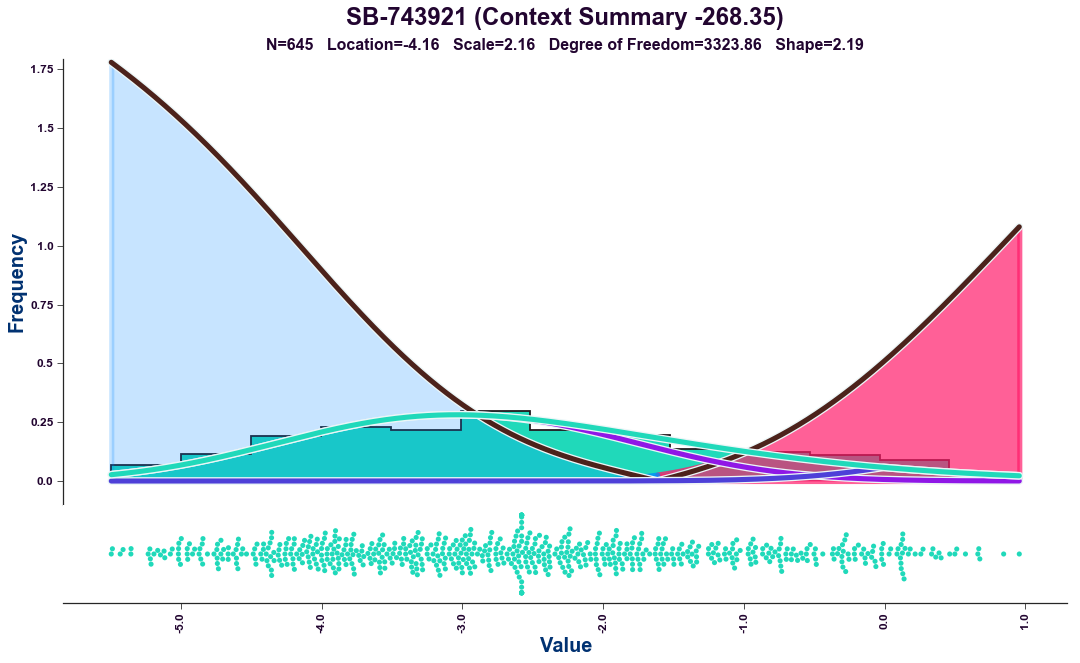

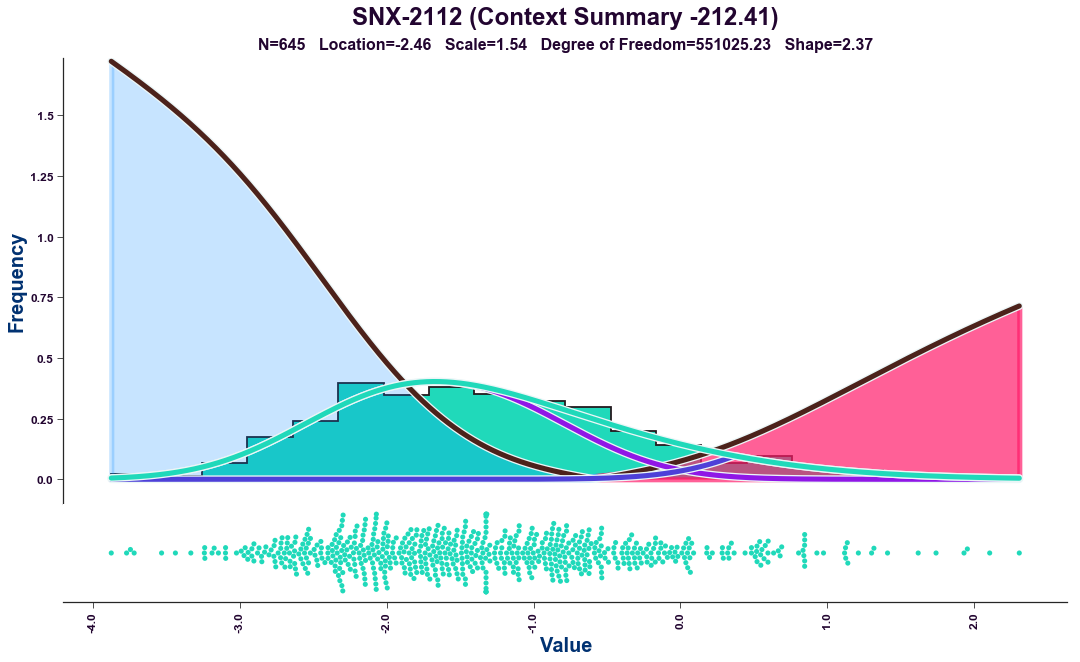

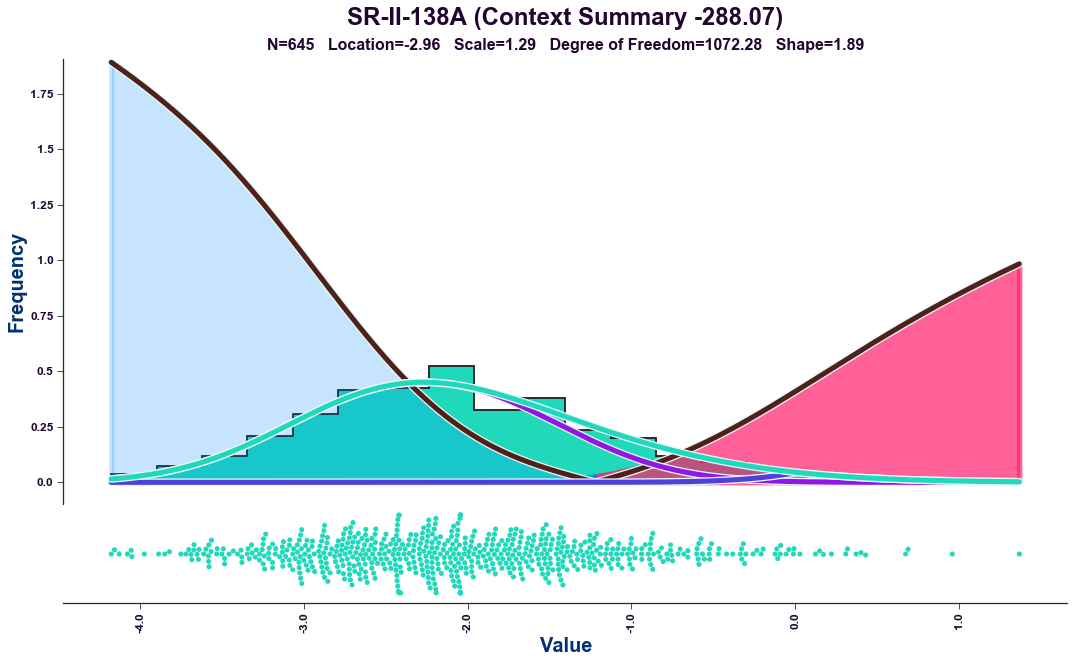

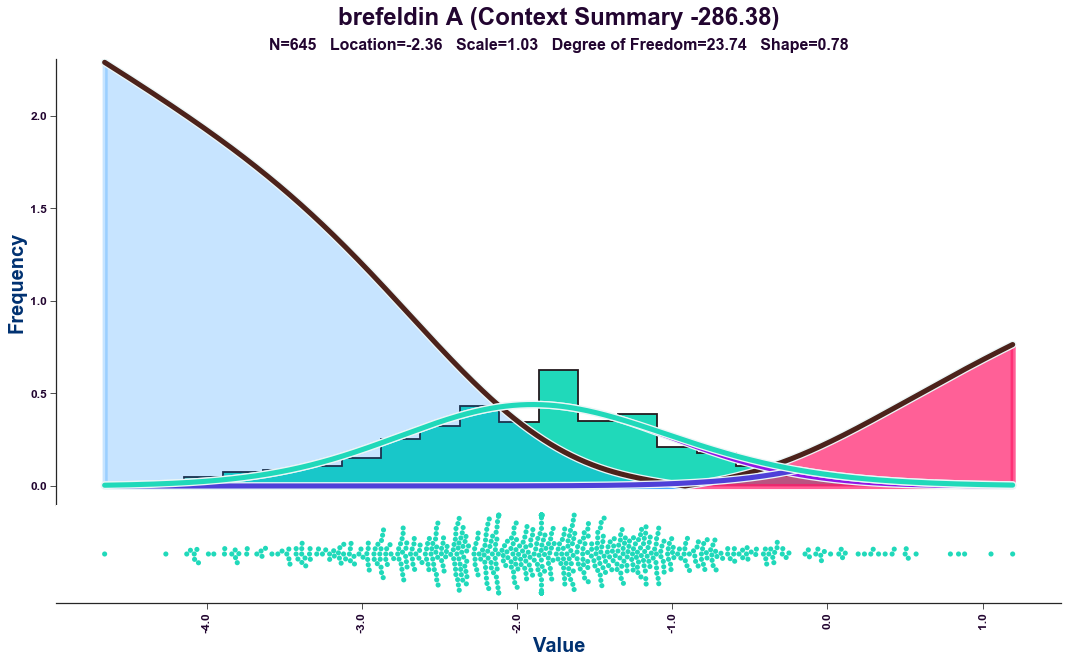

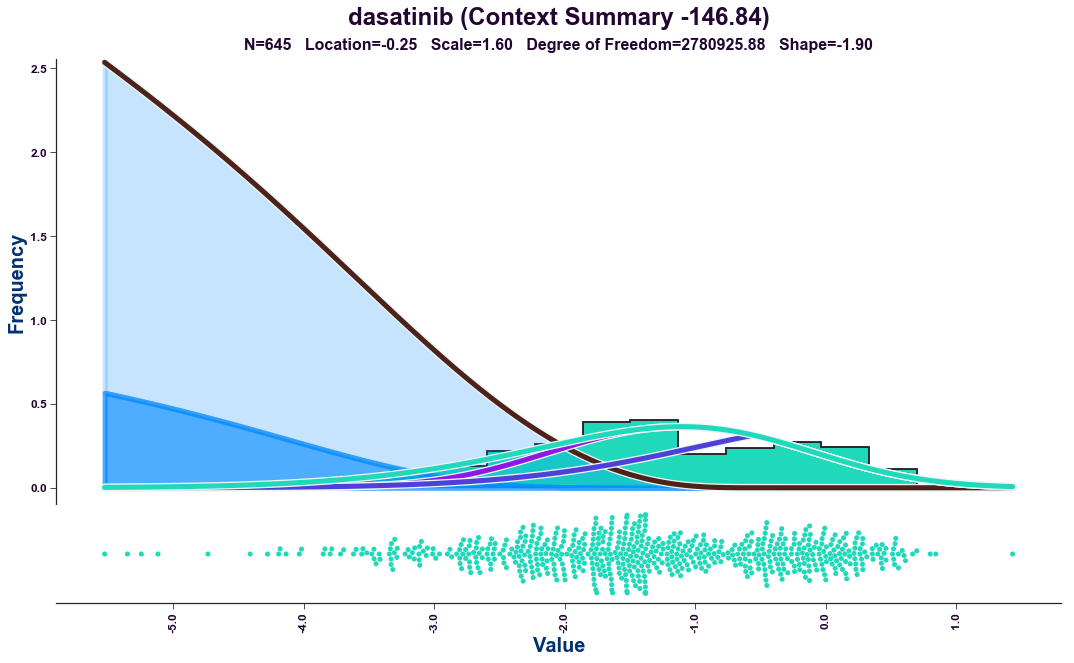

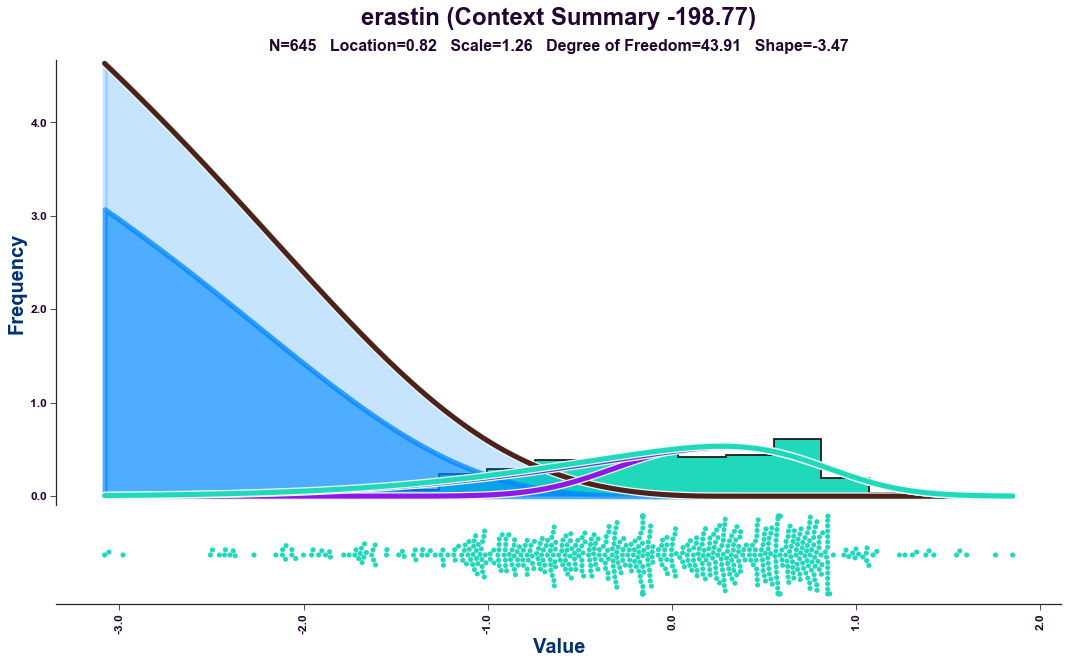

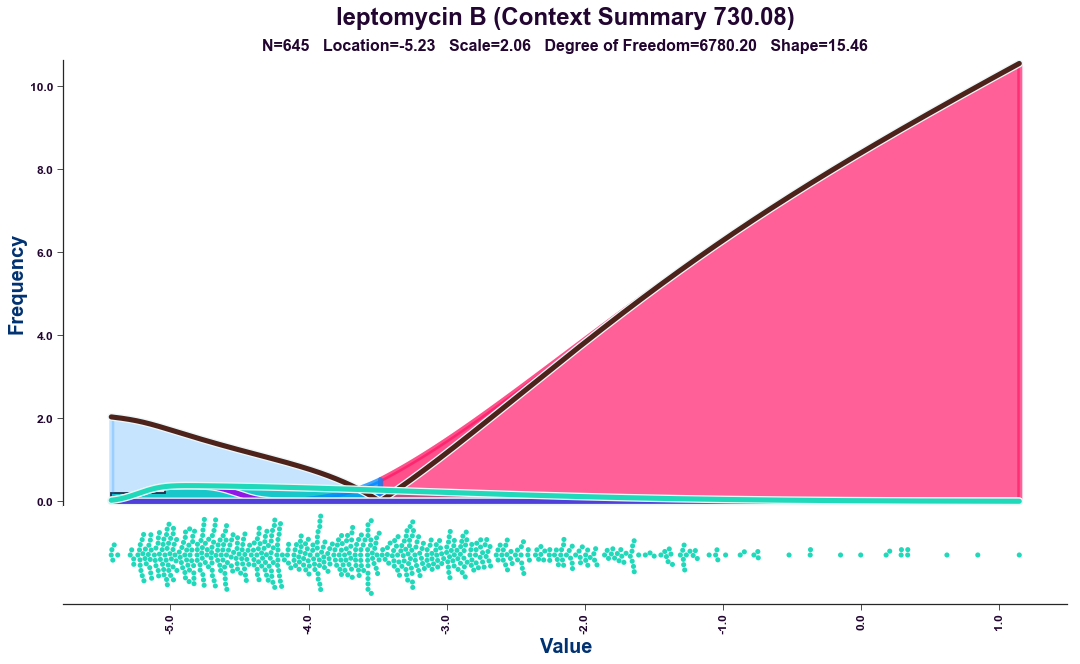

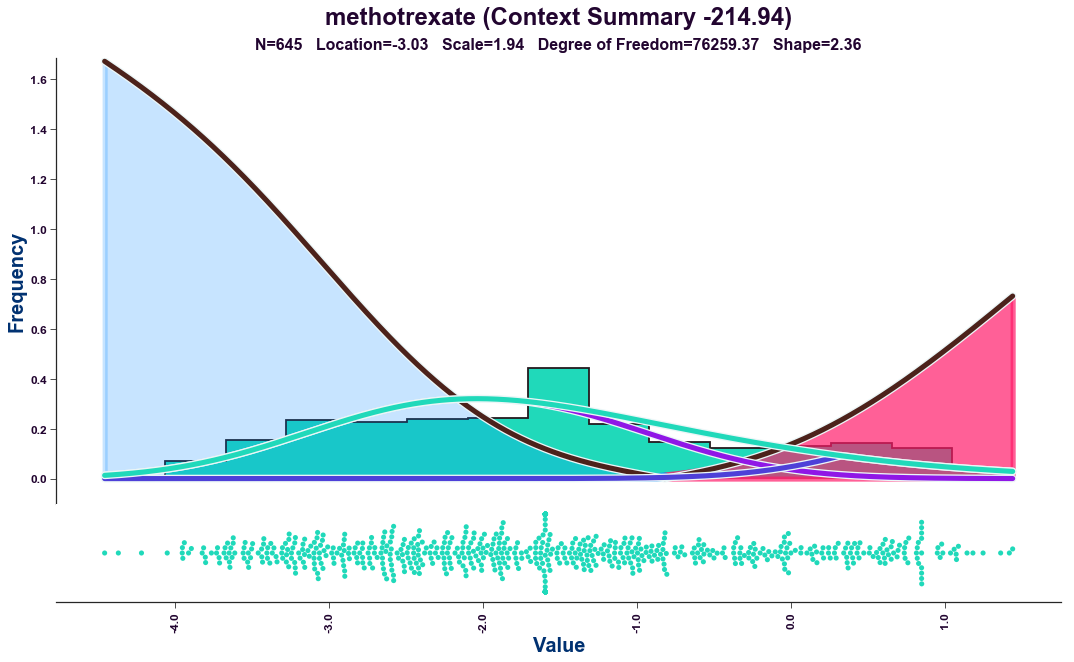

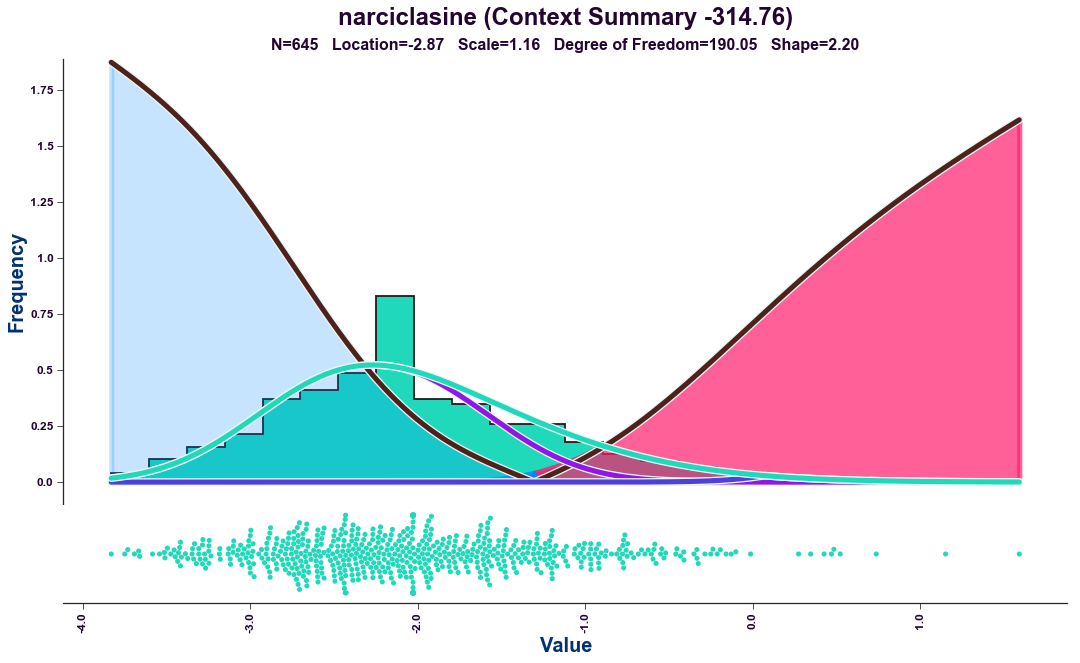

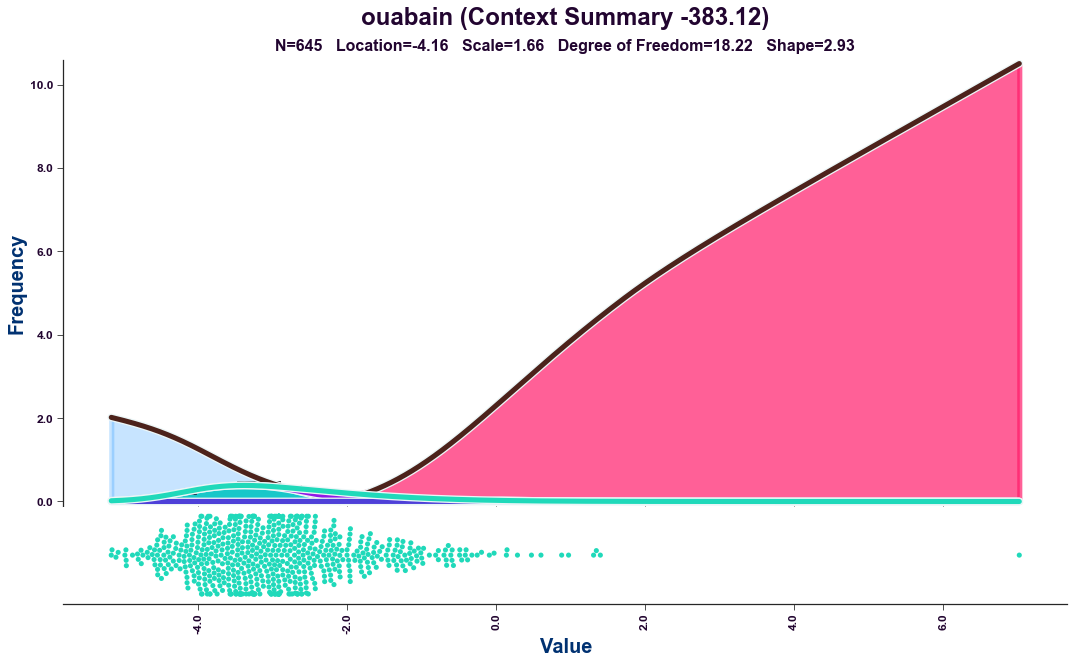

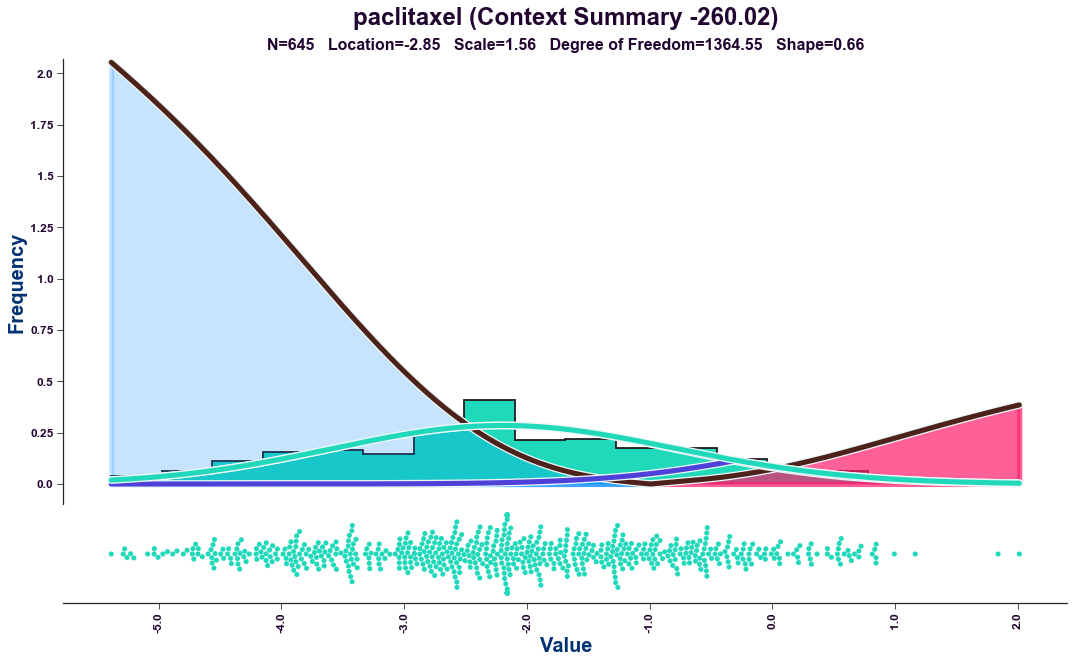

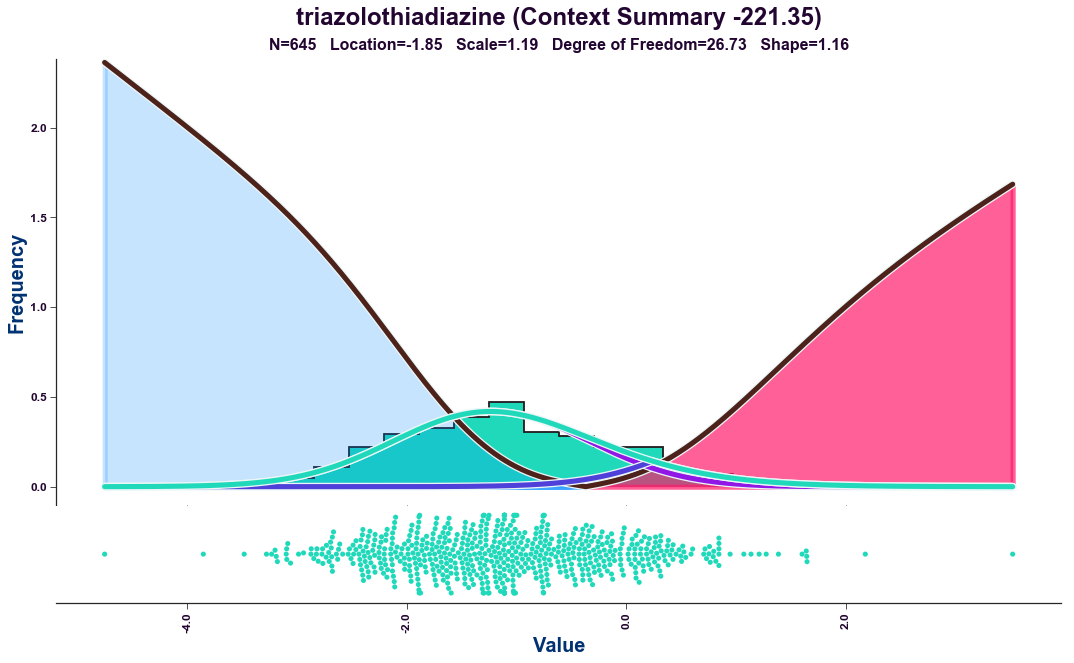

In [14]:
for feature, feature_vector in feature_x_sample.iterrows():

    if feature not in (
            '1S,3R-RSL-3',
            'AZD1480',
            'AZD7762',
            'AZD8055',
            'BI-2536',
            'CAY10618',
            'CR-1-31B',
            'GSK461364',
            'LBH-589',
            'ML162',
            'ML210',
            'MLN2238',
            'RITA',
            'SB-743921',
            'SNX-2112',
            'SR-II-138A',
            'brefeldin A',
            'dasatinib',
            'erastin',
            'leptomycin B',
            'methotrexate',
            'narciclasine',
            'ouabain',
            'paclitaxel',
            'triazolothiadiazine', ):
        continue

    plot_context(
        feature_vector.dropna(),
        feature,
        global_location=global_location,
        global_scale=global_scale)

    mpl.pyplot.show()